In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling as profile   # To check data distributions and correlations
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
from scipy import stats

from pylab import rcParams

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42



In [2]:
RawData=pd.read_csv("C:/Users/spati/Documents/FraudAnalysisDataV5.csv")

In [3]:
#RawData=pd.read_csv("C:/Users/spati/Documents/FraudAnalysisDataV3.csv")

In [4]:
## Lets Check Shape of datasets 

print('Shape of Train data :',RawData.shape)

Shape of Train data : (81139, 18)


In [5]:
RawData.head(5)

,ClaimID,FDOS,Age,Gender,POS,BillType,CPT,RevCode,Charg,ConctractAmt,PaidAmt,Diag1,Diag2,Diag3,Diag4,Flag_ExistingLogic,Combination,ClaimLabel_New
0,4301DM0DEF,4/9/2022,39,F,22,131,J1885,636,0.0,1.97,1.97,K529,R112,J45909,I10,NaN,F 22 J1885 K529 R112,Fraudulent
1,0201DM0MgH,7/11/2022,55,F,22,131,J3490,637,14.2,0.00,0.00,S90219A,S91111A,F32A,F17210,NaN,F 22 J3490 S90219A S91111A,Fraudulent
2,9801DM0JtN,5/25/2022,52,F,22,131,83036,300,0.0,20.04,16.04,G459,R202,F419,E538,NaN,F 22 83036 G459 R202,Fraudulent
3,9801DM0NTc,5/25/2022,52,F,22,131,85610,300,0.0,14.92,11.94,G459,R202,F419,E538,NaN,F 22 85610 G459 R202,Fraudulent
4,9801DM0FTF,5/25/2022,52,F,22,131,94640,410,0.0,26.95,21.56,G459,R202,F419,E538,NaN,F 22 94640 G459 R202,Fraudulent


In [6]:
RawData.isna().sum()

ClaimID                   0
FDOS                      0
Age                       0
Gender                    0
POS                       0
BillType                  0
CPT                       0
RevCode                   0
Charg                     0
ConctractAmt              0
PaidAmt                   0
Diag1                     0
Diag2                     0
Diag3                     0
Diag4                     0
Flag_ExistingLogic    69959
Combination               0
ClaimLabel_New            0
dtype: int64

In [7]:
RawData.dtypes

ClaimID                object
FDOS                   object
Age                     int64
Gender                 object
POS                     int64
BillType                int64
CPT                    object
RevCode                 int64
Charg                 float64
ConctractAmt          float64
PaidAmt               float64
Diag1                  object
Diag2                  object
Diag3                  object
Diag4                  object
Flag_ExistingLogic     object
Combination            object
ClaimLabel_New         object
dtype: object

In [8]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81139 entries, 0 to 81138
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ClaimID             81139 non-null  object 
 1   FDOS                81139 non-null  object 
 2   Age                 81139 non-null  int64  
 3   Gender              81139 non-null  object 
 4   POS                 81139 non-null  int64  
 5   BillType            81139 non-null  int64  
 6   CPT                 81139 non-null  object 
 7   RevCode             81139 non-null  int64  
 8   Charg               81139 non-null  float64
 9   ConctractAmt        81139 non-null  float64
 10  PaidAmt             81139 non-null  float64
 11  Diag1               81139 non-null  object 
 12  Diag2               81139 non-null  object 
 13  Diag3               81139 non-null  object 
 14  Diag4               81139 non-null  object 
 15  Flag_ExistingLogic  11180 non-null  object 
 16  Comb

Descriptive Statistics:
                CPT         Charg  ConctractAmt       PaidAmt
count  81139.000000  81139.000000  81139.000000  81139.000000
mean   63722.822034    540.571259    257.247739    169.892079
std    39099.741766   1154.564024   1040.409979    880.456313
min        0.000000 -21961.770000 -21961.770000 -21961.770000
25%        0.000000     89.000000      0.000000      0.000000
50%    83050.000000    171.000000      0.000000      0.000000
75%    93005.000000    342.500000     59.120000      3.870000
max    99285.000000  61536.300000  59515.680000  59015.680000

Correlation Matrix:
                   CPT     Charg  ConctractAmt   PaidAmt
CPT           1.000000  0.201685      0.162944  0.120914
Charg         0.201685  1.000000      0.532895  0.493062
ConctractAmt  0.162944  0.532895      1.000000  0.938670
PaidAmt       0.120914  0.493062      0.938670  1.000000


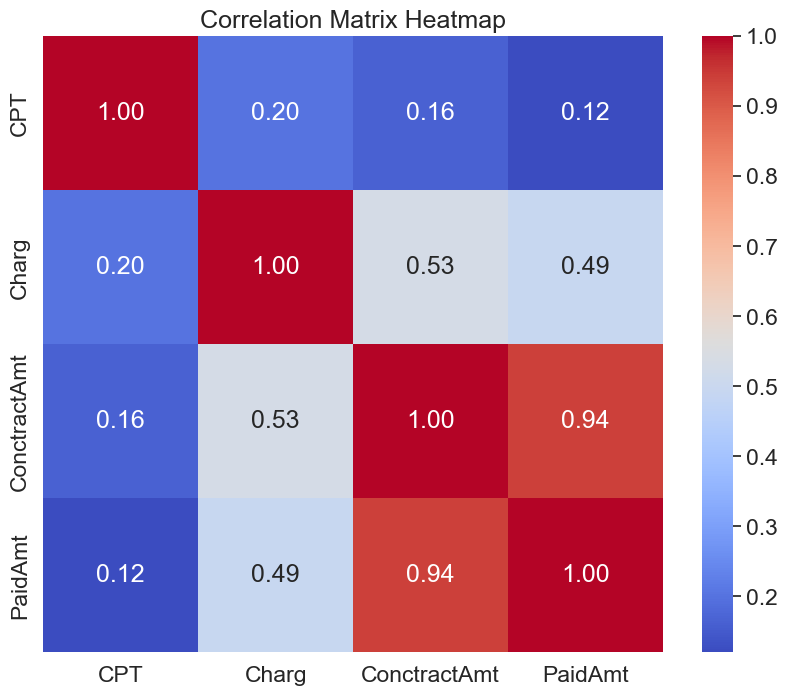

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'RawData' is your DataFrame
# List of columns to exclude
exclude_columns = ['ClaimID','FDOS','Age','Gender','RevCode', 'POS', 'BillType','Diag1','Diag2','Diag3','Diag4','Flag_ExistingLogic',
                  'Combination','ClaimLabel_New']

# Create a new DataFrame excluding the specified columns
filtered_data = RawData.drop(columns=exclude_columns)

# Convert all columns to numeric, coercing non-numeric values to NaN
for col in filtered_data.columns:
    filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce')

# Fill NaN values with a suitable value (e.g., 0 or the column mean)
# Here, we fill with 0
filtered_data = filtered_data.fillna(0)


# Generate Descriptive Statistics Table
descriptive_stats = filtered_data.describe()

# Display Descriptive Statistics Table
print("Descriptive Statistics:")
print(descriptive_stats)

# Save the descriptive statistics to a CSV file
descriptive_stats.to_csv('descriptive_statistics.csv')

# Generate Correlation Matrix
correlation_matrix = filtered_data.corr()

# Display Correlation Matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv('correlation_matrix.csv')

# Visualize the Correlation Matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [10]:
filtered_data = RawData[RawData['Flag_ExistingLogic'] != 'NULL']
grouped_data = filtered_data.groupby(['Diag1', 'Flag_ExistingLogic']).agg({'PaidAmt': ['count', 'sum']})
grouped_data.columns = ['n', 'PaidAmt']
grouped_data.reset_index(inplace=True)


In [11]:
sorted_data = grouped_data.sort_values(by='n', ascending=False)
print(sorted_data)


        Diag1 Flag_ExistingLogic     n    PaidAmt
789   N390                InDiag  1082   42543.66
987   R079                  InEM   396  461876.09
988   R079                 InPOS   262   15780.20
984   R0789                 InEM   192  290356.70
821   N760                 InGen   186   10988.33
...       ...                ...   ...        ...
738   M79622                InEM     1    1515.42
739   M79641               InPOS     1       0.00
740   M79642               InPOS     1       0.00
741   M79652                InEM     1    2055.19
1613  Z9049                 InEM     1    5122.91

[1614 rows x 4 columns]


In [12]:
grouped_data.reset_index(inplace=True)

In [13]:
# Group data by 'Flag' and calculate count and sum of 'PaidAmt'
grouped_data = RawData.groupby('Flag_ExistingLogic').agg({'PaidAmt': ['count', 'sum']})
grouped_data.columns = ['VolumeCount', 'Paid Amount']
grouped_data.reset_index(inplace=True)

# Print the results
print(grouped_data)

  Flag_ExistingLogic  VolumeCount  Paid Amount
0             InDiag         1876    140763.97
1               InEM         4405   7373356.03
2              InGen          553     58257.91
3              InOBs            7      3453.72
4              InPOS         4333    364801.96
5             InProc            6       346.84


In [14]:
# Group data by 'Flag' and calculate count and sum of 'PaidAmt'
grouped_data = RawData.groupby('ClaimLabel_New').agg({'PaidAmt': ['count', 'sum']})
grouped_data.columns = ['VolumeCount', 'Paid Amount']
grouped_data.reset_index(inplace=True)

# Print the results
print(grouped_data)

  ClaimLabel_New  VolumeCount  Paid Amount
0     Fraudulent        17850   8445517.47
1         Normal        63289   5339355.94


In [15]:
filtered_data = RawData[RawData['ClaimLabel_New'] != 'NULL']
grouped_data = filtered_data.groupby(['Diag1', 'ClaimLabel_New']).agg({'PaidAmt': ['count', 'sum']})
grouped_data.columns = ['n', 'PaidAmt']
grouped_data.reset_index(inplace=True)

In [16]:
sorted_data = grouped_data.sort_values(by='n', ascending=False)
print(sorted_data)

        Diag1 ClaimLabel_New     n    PaidAmt
1663  R079            Normal  3698  406438.27
1661  R0789           Normal  1741  119089.97
1696  R109            Normal  1639   35379.87
1706  R112            Normal  1479   71346.41
2920  U071            Normal  1286   64736.66
...       ...            ...   ...        ...
2548  S76812A         Normal     1       0.00
1888  S0001XA     Fraudulent     1       0.00
575   I8001       Fraudulent     1     652.33
1885  R9389           Normal     1       0.00
1215  M67449      Fraudulent     1     325.04

[3011 rows x 4 columns]


# Significance of few terminologies in the context of insurance data analysis for fraud detection:
	1. True Positive (TP):
		○ In the context of insurance fraud detection, a true positive represents a transaction that the model correctly identifies as fraudulent. It means the model flagged a potentially fraudulent case, and upon investigation, it was indeed fraudulent.
		○ Significance: High TP rate ensures that actual fraud cases are detected, leading to timely action (e.g., blocking the transaction, investigating further, or alerting authorities).
	
    2. False Positive (FP):
		○ A false positive occurs when the model incorrectly classifies a legitimate transaction as fraudulent. It raises a false alarm, potentially inconveniencing the customer.
		○ Significance: While minimizing FP is essential, too many false alarms can strain customer trust and operational efficiency. Balancing precision (low FP) and recall (high TP) is crucial.
	
    3. True Negative (TN):
		○ In fraud detection, a true negative represents a legitimate transaction correctly identified as non-fraudulent. These are the “normal” transactions that don’t raise suspicion.
		○ Significance: High TN rate ensures that genuine transactions proceed smoothly without unnecessary scrutiny.
        
	4. False Negative (FN):
		○ A false negative occurs when the model fails to detect a fraudulent transaction. It means the system missed a potentially fraudulent case.
		○ Significance: Minimizing FN is critical because missing actual fraud can lead to financial losses, damage to reputation, and legal consequences.
        
	5. Precision:
		○ Precision (Positive Predictive Value) measures the proportion of flagged fraud cases that are genuinely fraudulent.
		○ Significance: High precision ensures that when the model raises an alert, it is likely a true fraud case. However, overly aggressive models may sacrifice recall (miss actual fraud) to achieve high precision.
        
	6. Recall (Sensitivity):
		○ Recall measures the proportion of actual fraud cases correctly identified by the model.
		○ Significance: High recall ensures that the model doesn’t miss actual fraud. However, overly sensitive models may generate more false positives.
        
	7. Specificity (True Negative Rate):
		○ Specificity measures the proportion of actual non-fraudulent cases correctly identified by the model.
		○ Significance: High specificity ensures that legitimate transactions are not unnecessarily flagged as fraud. It complements recall.
        
	8. F1 Score:
		○ The F1 score balances precision and recall. It considers both false positives and false negatives.
		○ Significance: F1 score helps strike a balance between identifying actual fraud (recall) and minimizing false alarms (precision).
        
	9. Accuracy:
		○ Accuracy measures overall correctness (both TP and TN) of the model’s predictions.
		○ Significance: While accuracy is essential, it can be misleading in imbalanced datasets (where non-fraudulent transactions significantly outnumber fraud cases). Focusing on precision, recall, and F1 score is often more informative.
        
In summary, achieving a balance between detecting actual fraud (high recall) and minimizing false positives (high precision) is crucial in insurance fraud detection. Regular model evaluation and fine-tuning are essential to optimize these metrics based on business priorities and risk tolerance. 

Handling features with a large number of categories, like Diag1 and Diag2, can indeed be challenging due to the risk of increasing dimensionality and potentially introducing noise. So we can implement some strategies to handle such features effectively:

Frequency Encoding: Replace each category with the frequency of its occurrence in the dataset. This can help the model understand the prevalence of each code without increasing dimensionality.

Binary Encoding: Convert categories into binary columns, but with a logarithmic reduction in dimensionality compared to one-hot encoding.

Grouping Rare Categories: Combine the less frequent categories into a single ‘Other’ category to reduce the number of unique categories.

## Frequency Encoding

In [17]:
# Calculate the frequency of each category
diag_freq = RawData['Diag1'].value_counts() / len(RawData)

# Map the frequencies to the original dataframe
RawData['Diag1_Freq'] = RawData['Diag1'].map(diag_freq)

# Repeat for DiagCode2
diag_freq = RawData['Diag2'].value_counts() / len(RawData)
RawData['Diag2_Freq'] = RawData['Diag2'].map(diag_freq)

# Now you can drop the original DiagCode1 and DiagCode2 columns
RawData.drop(['Diag1', 'Diag2','Diag3', 'Diag4'], axis=1, inplace=True)

CPT_freq = RawData['CPT'].value_counts() / len(RawData)
RawData['CPT_Freq'] = RawData['CPT'].map(CPT_freq)
RawData.drop(['CPT'], axis=1, inplace=True)

In [18]:
# import pandas as pd

# Assuming 'NULL' is a string in the 'Flag' column
# RawData['Flag_Labels'] = RawData['Flag'].apply(lambda x: 'Potential_Fraud' if x != 'NULL' else 'Normal')


In [19]:
RawData.head(5)

,ClaimID,FDOS,Age,Gender,POS,BillType,RevCode,Charg,ConctractAmt,PaidAmt,Flag_ExistingLogic,Combination,ClaimLabel_New,Diag1_Freq,Diag2_Freq,CPT_Freq
0,4301DM0DEF,4/9/2022,39,F,22,131,636,0.0,1.97,1.97,NaN,F 22 J1885 K529 R112,Fraudulent,0.007555,0.020902,0.015800
1,0201DM0MgH,7/11/2022,55,F,22,131,637,14.2,0.00,0.00,NaN,F 22 J3490 S90219A S91111A,Fraudulent,0.000136,0.000222,0.024600
2,9801DM0JtN,5/25/2022,52,F,22,131,300,0.0,20.04,16.04,NaN,F 22 83036 G459 R202,Fraudulent,0.010180,0.005016,0.002243
3,9801DM0NTc,5/25/2022,52,F,22,131,300,0.0,14.92,11.94,NaN,F 22 85610 G459 R202,Fraudulent,0.010180,0.005016,0.007826
4,9801DM0FTF,5/25/2022,52,F,22,131,410,0.0,26.95,21.56,NaN,F 22 94640 G459 R202,Fraudulent,0.010180,0.005016,0.001898


In [20]:
X = RawData.drop(columns=['ClaimID','FDOS','Flag_ExistingLogic','ClaimLabel_New','Combination'], axis=1)   # Features
y = RawData['ClaimLabel_New']  # Target

In [21]:
X.drop(['BillType','RevCode','Charg', 'ConctractAmt', 'PaidAmt'], axis=1, inplace=True)

In [22]:
X.head(5)

,Age,Gender,POS,Diag1_Freq,Diag2_Freq,CPT_Freq
0,39,F,22,0.007555,0.020902,0.015800
1,55,F,22,0.000136,0.000222,0.024600
2,52,F,22,0.010180,0.005016,0.002243
3,52,F,22,0.010180,0.005016,0.007826
4,52,F,22,0.010180,0.005016,0.001898


In [23]:
# Encode Gender column using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['Gender'], drop_first=True)  # Drop first category (M)

In [24]:
X_encoded.head(5)

,Age,POS,Diag1_Freq,Diag2_Freq,CPT_Freq,Gender_M
0,39,22,0.007555,0.020902,0.015800,False
1,55,22,0.000136,0.000222,0.024600,False
2,52,22,0.010180,0.005016,0.002243,False
3,52,22,0.010180,0.005016,0.007826,False
4,52,22,0.010180,0.005016,0.001898,False


In [25]:
from sklearn.preprocessing import StandardScaler


# Standardize the features (important for PCA)
features = ['Age','Gender_M', 'Diag1_Freq', 'Diag2_Freq','CPT_Freq','POS']

In [26]:
# Separating out the features
x = X_encoded.loc[:, features].values

In [27]:
# Separating out the target
target = RawData.loc[:, 'ClaimLabel_New'].values

In [28]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [29]:
X_encoded.dtypes

Age             int64
POS             int64
Diag1_Freq    float64
Diag2_Freq    float64
CPT_Freq      float64
Gender_M         bool
dtype: object

In [30]:
X_encoded['Gender_M'] = X_encoded['Gender_M'].astype(float)

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.87      0.65      0.75      3527
           1       0.91      0.97      0.94     12701

    accuracy                           0.90     16228
   macro avg       0.89      0.81      0.84     16228
weighted avg       0.90      0.90      0.90     16228

Accuracy: 0.9029455262509243
Confusion Matrix:
 [[ 2308  1219]
 [  356 12345]]

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      3527
           1       0.91      0.90      0.90     12701

    accuracy                           0.85     16228
   macro avg       0.78      0.80      0.79     16228
weighted avg       0.86      0.85      0.85     16228

Accuracy: 0.8519842247966478
Confusion Matrix:
 [[ 2455  1072]
 [ 1330 11371]]


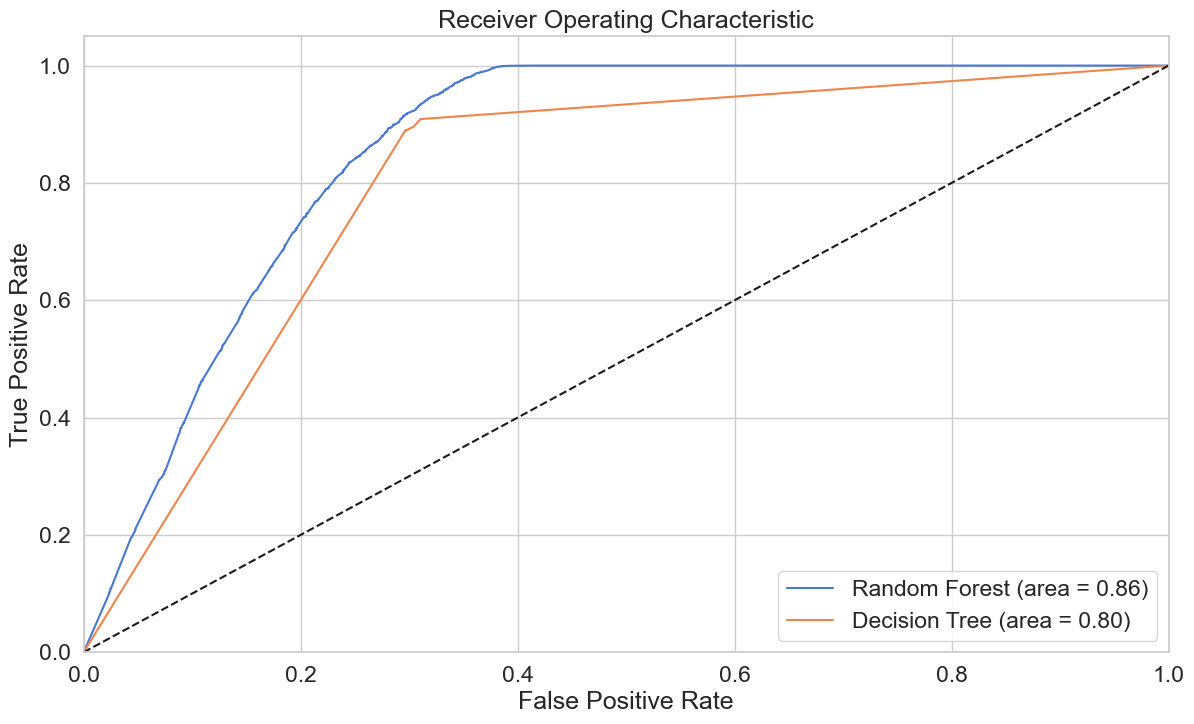

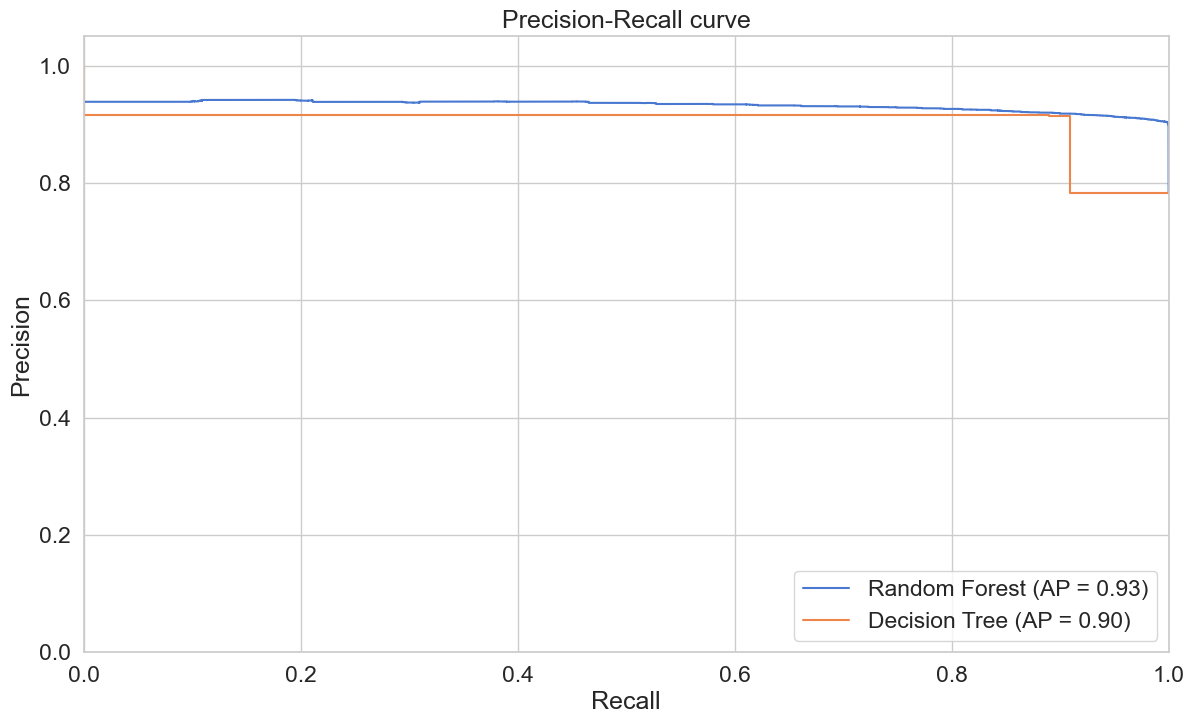

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor 
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Initialize LabelEncoder for target variable
label_encoder = LabelEncoder()

# Encode target variable (y) into numeric labels
y_encoded = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
# Set test_size to 0.2 to allocate 20% of the training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Fit models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Predict probabilities
rf_probs = rf_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]

# Predict classes
rf_preds = rf_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Compute ROC curve and ROC area for each class
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

rf_roc_auc = auc(rf_fpr, rf_tpr)
dt_roc_auc = auc(dt_fpr, dt_tpr)

# Evaluate Random Forest
print("Random Forest Classifier:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

# Evaluate Decision Tree
print("\nDecision Tree Classifier:")
print(classification_report(y_test, dt_preds))
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

# Plot all ROC curves
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute Precision-Recall curve for each class
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)

rf_ap = average_precision_score(y_test, rf_probs)
dt_ap = average_precision_score(y_test, dt_probs)

# Plot all Precision-Recall curves
plt.figure()
plt.step(rf_recall, rf_precision, where='post', label='Random Forest (AP = %0.2f)' % rf_ap)
plt.step(dt_recall, dt_precision, where='post', label='Decision Tree (AP = %0.2f)' % dt_ap)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()



Now let's try to implement XGBoost model also for our dataset. Before implementing this, Let me note down some of the features and differences between XGBoost and Random Forest here.

XGBoost and Random Forest are both ensemble learning methods used for classification and regression tasks, but they differ in their approach and capabilities:

XGBoost:
	• Stands for eXtreme Gradient Boosting.
	• It’s a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
	• In prediction problems involving unstructured data (images, text, etc.), it can push the limit of computing power for           boosted trees.
	• Works well with large datasets and can handle sparse data from one-hot encoding without memory blowouts.
	• Uses a sequential tree building algorithm, which allows it to optimize on the accuracy by learning from the previous           trees’ mistakes.
	• Can handle missing data - imputation not required.
	• Provides a variety of regularization techniques to prevent overfitting and to improve performance.

Forest:
	• A bagging technique that creates a ‘forest’ of uncorrelated decision trees.
	• Each tree is trained on a random subset of the data and makes its own predictions.
	• The final prediction is made based on the majority voting from all trees.
	• It’s more interpretable since you can easily extract the importance of each variable.
	• Tends to be faster to train than XGBoost because of parallel tree construction.
	• Less prone to overfitting compared to individual decision trees.

For predicting fraud claims with a binary classification type target variable, XGBoost might be more suitable due to its efficiency with large datasets and its ability to handle imbalanced data, which is common in fraud detection. However, Random Forest can also be a decent choice, especially if we need a quick baseline model or if interpretability is important for our tasks.

The choice between XGBoost and Random Forest should be based on the specific characteristics of our dataset and the problem at hand. Let's try to implement both algorithms and compare their performance through cross-validation.

In [32]:
# !pip install xgboost

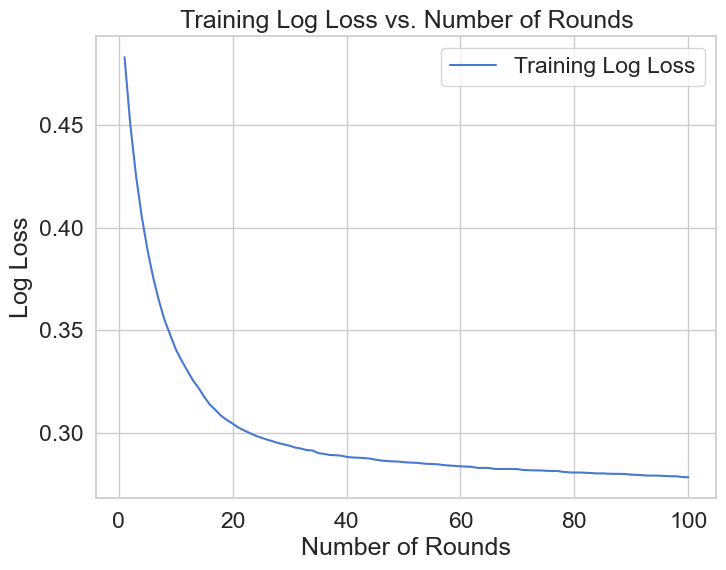

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic',  # Binary classification
    random_state=42
)

# Split the training data into training and validation sets
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Fit the model on the new training data
xgb_classifier.fit(X_train_new, y_train_new, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

# Get the training log losses
training_results = xgb_classifier.evals_result()
train_log_losses = training_results['validation_0']['logloss']

# Plot the training log losses
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_log_losses) + 1), train_log_losses, label='Training Log Loss')
plt.xlabel('Number of Rounds')
plt.ylabel('Log Loss')
plt.title('Training Log Loss vs. Number of Rounds')
plt.grid(True)
plt.legend()
plt.show()

# Assuming X_train, X_test, y_train, and y_test are defined
# Instantiate the custom XGBoost classifier
model = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)

# Train the model
model.fit(X_train_new, y_train_new, eval_set=[(X_val, y_val)],  early_stopping_rounds=10,verbose=False)


Log loss, also known as logistic loss or cross-entropy loss, is used in XGBoost for binary classification tasks. It measures the performance of a classification model where the prediction is a probability between 0 and 1. The goal is to minimize this value, with 0 representing a perfect model and a higher number representing a worse model. Log loss penalizes false classifications by taking into account the uncertainty of the prediction based on the true label.

Plotting the log loss graph in XGBoost is useful for evaluating the model’s performance over iterations. It helps in understanding how quickly the model is learning, adjusting the learning rate, and deciding when the model starts to overfit by observing the performance on the training and validation datasets. 

This diagnostic tool can guide us in tuning the model’s hyperparameters for better performance.

In this code:

We create an XGBoost classifier with the specified parameters.
The eval_set argument in the fit method allows us to monitor the validation performance during training.
The training log losses are extracted from the evaluation results.
Finally, we plot the training log losses against the number of rounds.

Class Index  Class Name  
0            Fraudulent  
1            Normal      
Test Accuracy: 0.92
Confusion Matrix for Test Data:
[[ 2162  1365]
 [    3 12698]]
Classification Report for Test Data using XGBoost model:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76      3527
           1       0.90      1.00      0.95     12701

    accuracy                           0.92     16228
   macro avg       0.95      0.81      0.85     16228
weighted avg       0.92      0.92      0.91     16228

Validation Accuracy: 0.91
Confusion Matrix for Validation Data:
[[1390  899]
 [   1 8096]]
Classification Report for Validation Data using XGBoost model:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76      2289
           1       0.90      1.00      0.95      8097

    accuracy                           0.91     10386
   macro avg       0.95      0.80      0.85     10386
weighted avg       0.92      

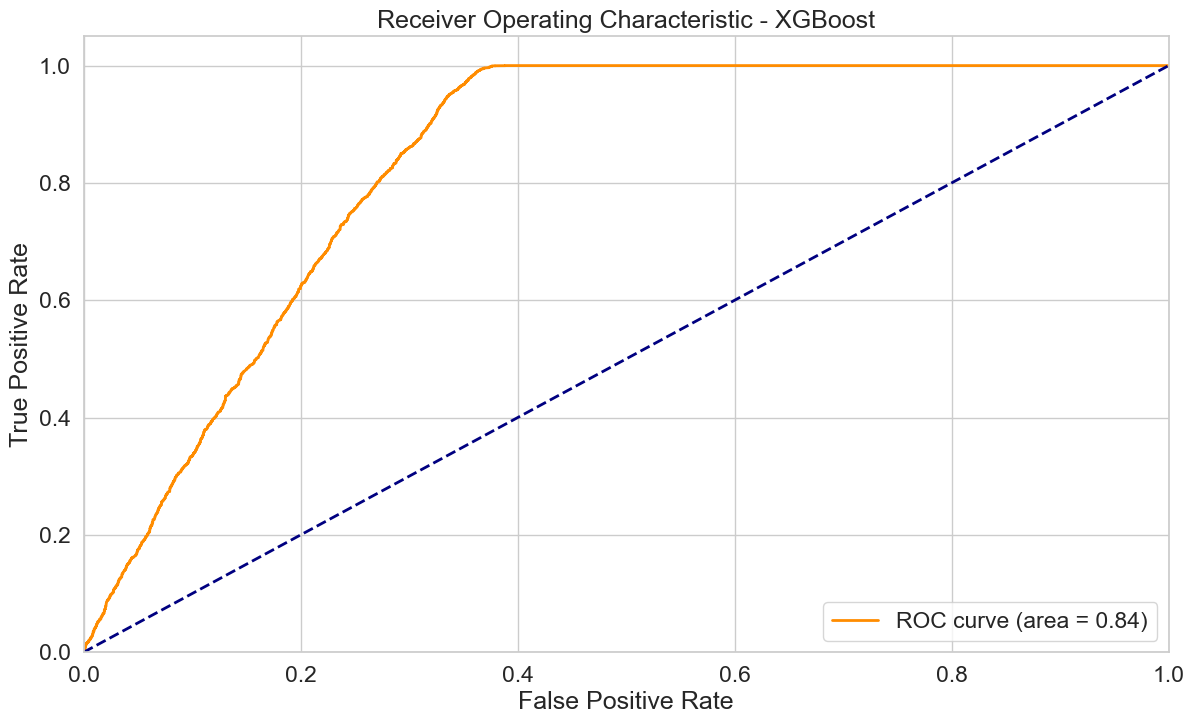

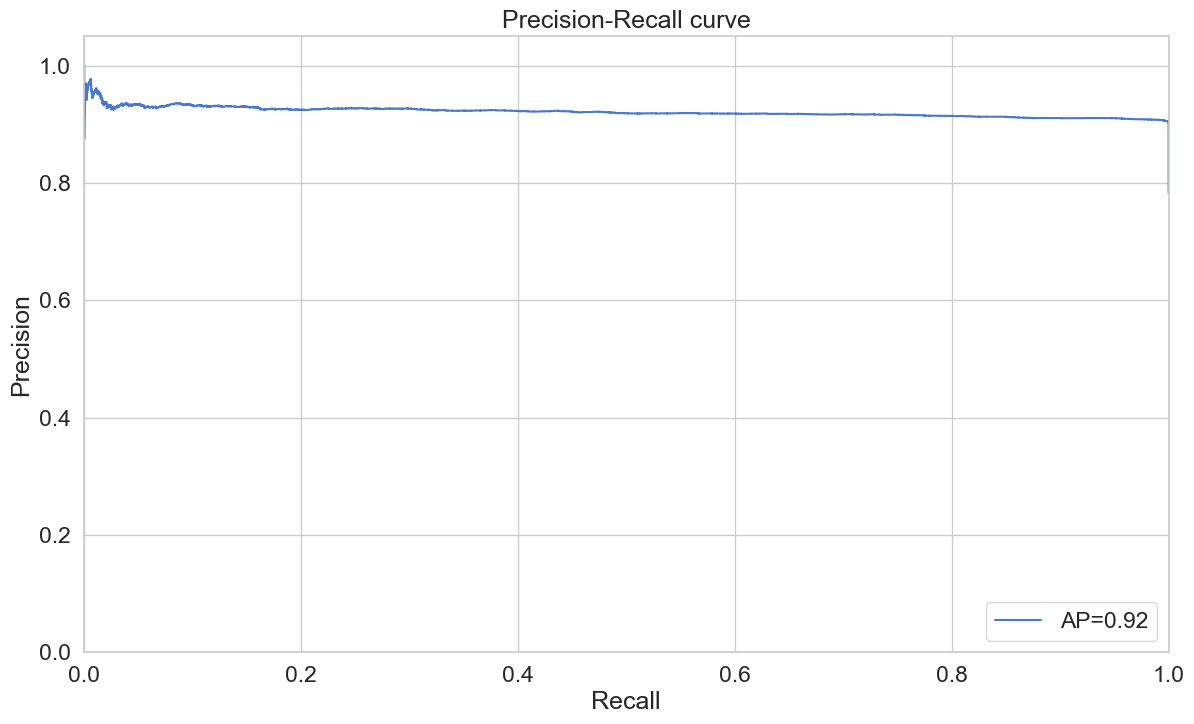

In [34]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Make predictions on test data
y_pred = model.predict(X_test)

# Print label names
classes = model.classes_
label_names = label_encoder.classes_

# Create a matrix to display class list and class names
class_matrix = []

# Add header row
header_row = ['Class Index', 'Class Name']
class_matrix.append(header_row)

# Add class index and class name for each class label
for idx, label in enumerate(classes):
    class_matrix.append([label, label_names[idx]])

# Display class list and class names in matrix form
for row in class_matrix:
    print("{:<12} {:<12}".format(*row))

# Evaluate accuracy for test data
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

conf_matrix_test = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix for Test Data:")
print(conf_matrix_test)

# Display classification report for test data
print("Classification Report for Test Data using XGBoost model:")
report = classification_report(y_test, y_pred)
print(report)

# Make predictions on validation data
y_val_pred = model.predict(X_val)

# Evaluate accuracy for validation data
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

conf_matrix_validation = confusion_matrix(y_val, y_val_pred)

# Print the confusion matrix
print("Confusion Matrix for Validation Data:")
print(conf_matrix_validation)

# Display classification report for validation data
print("Classification Report for Validation Data using XGBoost model:")
reportv = classification_report(y_val, y_val_pred)
print(reportv)

# Compute the probabilities of the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.show()

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure()
plt.step(recall, precision, where='post', label='AP={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

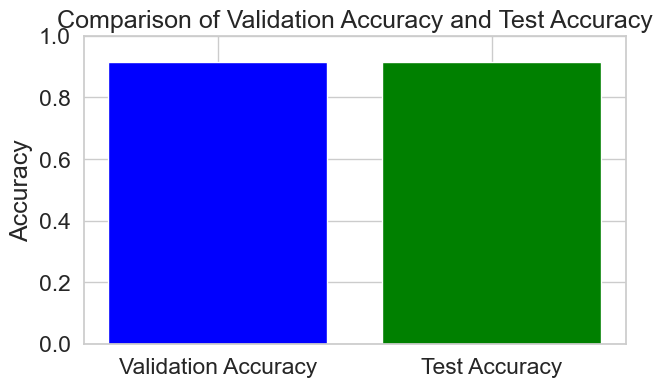

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
labels = ['Validation Accuracy', 'Test Accuracy']
accuracy_values = [val_accuracy, test_accuracy]

# Plotting
plt.figure(figsize=(7, 4))
plt.bar(labels, accuracy_values, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Validation Accuracy and Test Accuracy')
plt.ylim(0, 1)  # Setting y-axis limit to ensure the full range of accuracy values is visible

plt.show()